Share Prices

In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

1. Load the data from the re-uploaded CSV files

In [2]:
kghm_df = pd.read_csv('C:\Kodilla\share_prices\kgh_d (1).csv')
copper_df = pd.read_csv(r'C:\Kodilla\share_prices\ca_c_f_d (1).csv')

2. Convert the 'Data' columns to datetime format to ensure proper merging and plotting

In [3]:
kghm_df['Data'] = pd.to_datetime(kghm_df['Data']).dt.date
copper_df['Data'] = pd.to_datetime(copper_df['Data']).dt.date

3. Merge the two dataframes on the 'Data' column to align dates 

In [4]:
# Merge the two dataframes on the 'Data' column
merged_df = pd.merge(kghm_df[['Data', 'Zamkniecie']], copper_df[['Data', 'Zamkniecie']], on='Data')
merged_df.columns = ['Date', 'KGHM', 'Copper']  # Rename the columns to 'Date', 'KGHM', and 'Copper'

4. Plot the data

Plot for KGHM and Copper closing prices

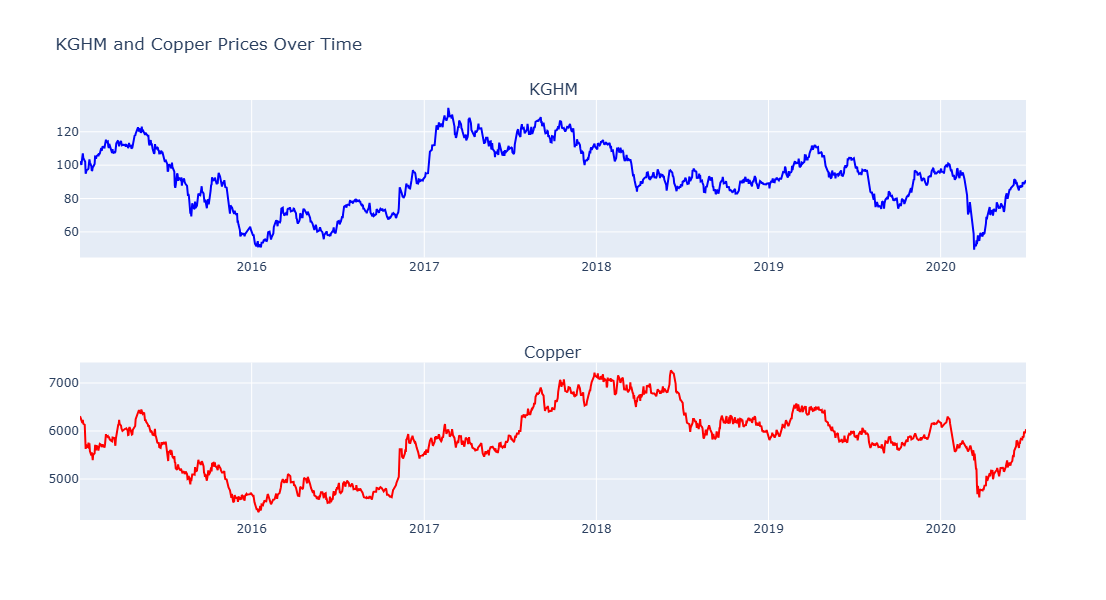

In [5]:
# Create the figure with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, subplot_titles=['KGHM', 'Copper'])

# Add the KGHM scatter plot trace to the first subplot
fig.add_trace(
    go.Scatter(x=merged_df['Date'], y=merged_df['KGHM'], mode='lines', name='KGHM', line=dict(color='blue')),
    row=1, col=1
)

# Add the Copper scatter plot trace to the second subplot
fig.add_trace(
    go.Scatter(x=merged_df['Date'], y=merged_df['Copper'], mode='lines', name='Copper', line=dict(color='red')),
    row=2, col=1
)

# Update the layout of the figure
fig.update_layout(height=600, width=800, title_text="KGHM and Copper Prices Over Time", showlegend=False)

# Show the figure
fig.show()

5. Table comparing the closing prices of KGHM and copper in the following days

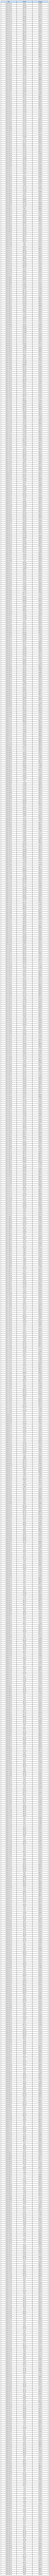

In [6]:
# Create the figure with 3 rows: 2 for plots and 1 for the table
fig = make_subplots(
    rows=3, cols=1, 
    subplot_titles=['KGHM', 'Copper', 'Closing Prices Table'], 
    shared_xaxes=True,
    row_heights=[0.3, 0.3, 0.4]  # Adjust heights for better spacing
)

# Now create and format the table separately using Matplotlib
fig_table, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')


# Create the table
table = ax.table(cellText=merged_df.values, colLabels=merged_df.columns, cellLoc='center', loc='center', colColours=['#cce5ff']*3)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Display the table
plt.show()